In [3]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('processed_data.csv')

with open("encoding_mappings.pkl","rb") as f:
    encoding_mappings = pickle.load(f)

In [5]:
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,1,2,5,0,1,3,0,2,0
1,0,2,2,3,0,1,2,1,5,0
2,0,2,2,3,0,1,2,0,2,0
3,0,4,0,2,0,1,2,1,3,0
4,0,2,2,0,0,1,2,1,4,0


### Visual Functions for dataset

In [6]:
def plot_class_distribution(data_preprocessed):
    """Plot pie chart showing distribution of cancer recurrence cases."""
    plt.figure(figsize=(12, 6))
    class_counts = data_preprocessed['Class'].value_counts()
    plt.pie(class_counts, labels=['No Recurrence', 'Recurrence'], 
            autopct='%1.1f%%', colors=['lightblue', 'salmon'])
    plt.title('Distribution of Breast Cancer Recurrence')
    plt.show()
    
def plot_age_distribution(data_preprocessed, encoding_mappings):
    """Plot box plot showing age distribution by recurrence status."""
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Class', y='age', data=data_preprocessed, 
                palette=['lightblue', 'salmon'])
    plt.title('Age Distribution by Recurrence Status')
    plt.xlabel('Recurrence Status')
    plt.ylabel('Age Group')
    plt.yticks(range(len(encoding_mappings['age'])), 
              list(encoding_mappings['age'].keys()))
    plt.show()


def plot_feature_distributions(data_preprocessed, encoding_mappings):
    """Plot grid of count plots showing distribution of selected features."""
    plt.figure(figsize=(15, 10))
    features_to_plot = ['deg-malig', 'inv-nodes', 'node-caps', 'irradiat']
    
    for idx, feature in enumerate(features_to_plot, 1):
        plt.subplot(2, 2, idx)
        sns.countplot(data=data_preprocessed, x=feature, hue='Class',
                     palette=['lightblue', 'salmon'])
        plt.title(f'{feature} Distribution by Class')
        plt.xlabel(feature)
        if feature in encoding_mappings:
            plt.xticks(range(len(encoding_mappings[feature])), 
                      list(encoding_mappings[feature].keys()), 
                      rotation=45)
        plt.legend(['No Recurrence', 'Recurrence'])
    
    plt.tight_layout()
    plt.show()


def plot_correlation_heatmap(data_preprocessed):
    """Plot correlation heatmap of all features."""
    plt.figure(figsize=(10, 8))
    correlation_matrix = data_preprocessed.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True)
    plt.title('Correlation Heatmap of Features')
    plt.show()

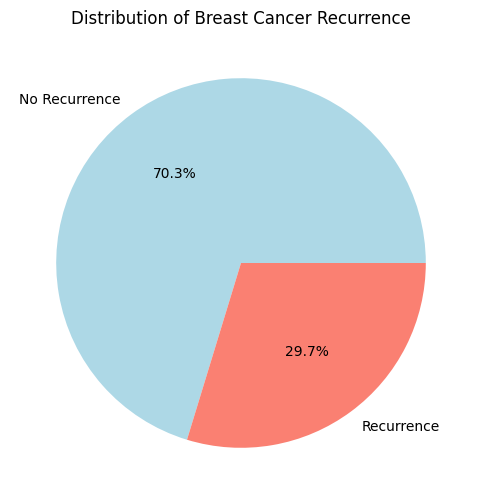

In [7]:
plot_class_distribution(data)

/var/folders/cq/x6p1bml53zs0fv1z7r55064m0000gn/T/ipykernel_48730/2546446872.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='age', data=data_preprocessed,


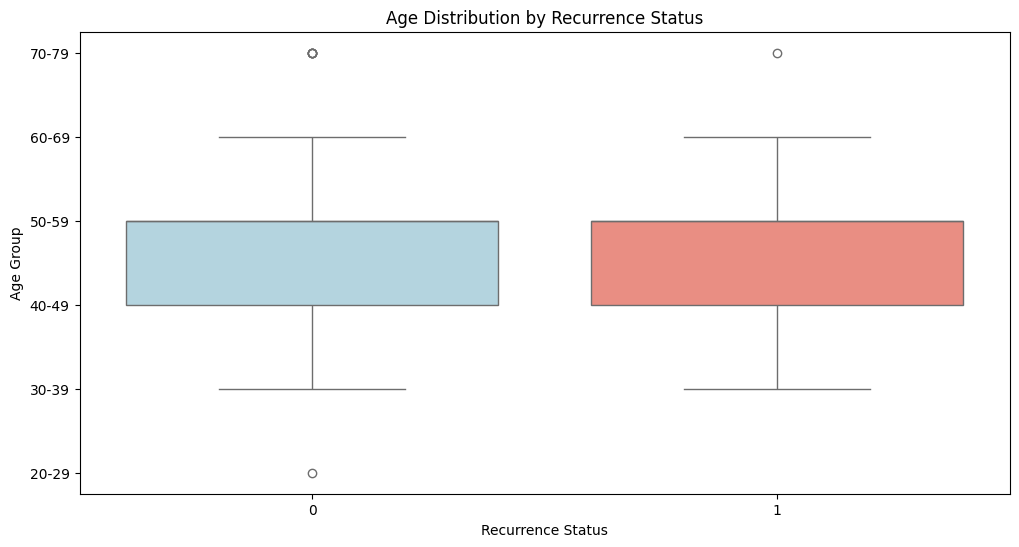

In [8]:
plot_age_distribution(data, encoding_mappings)

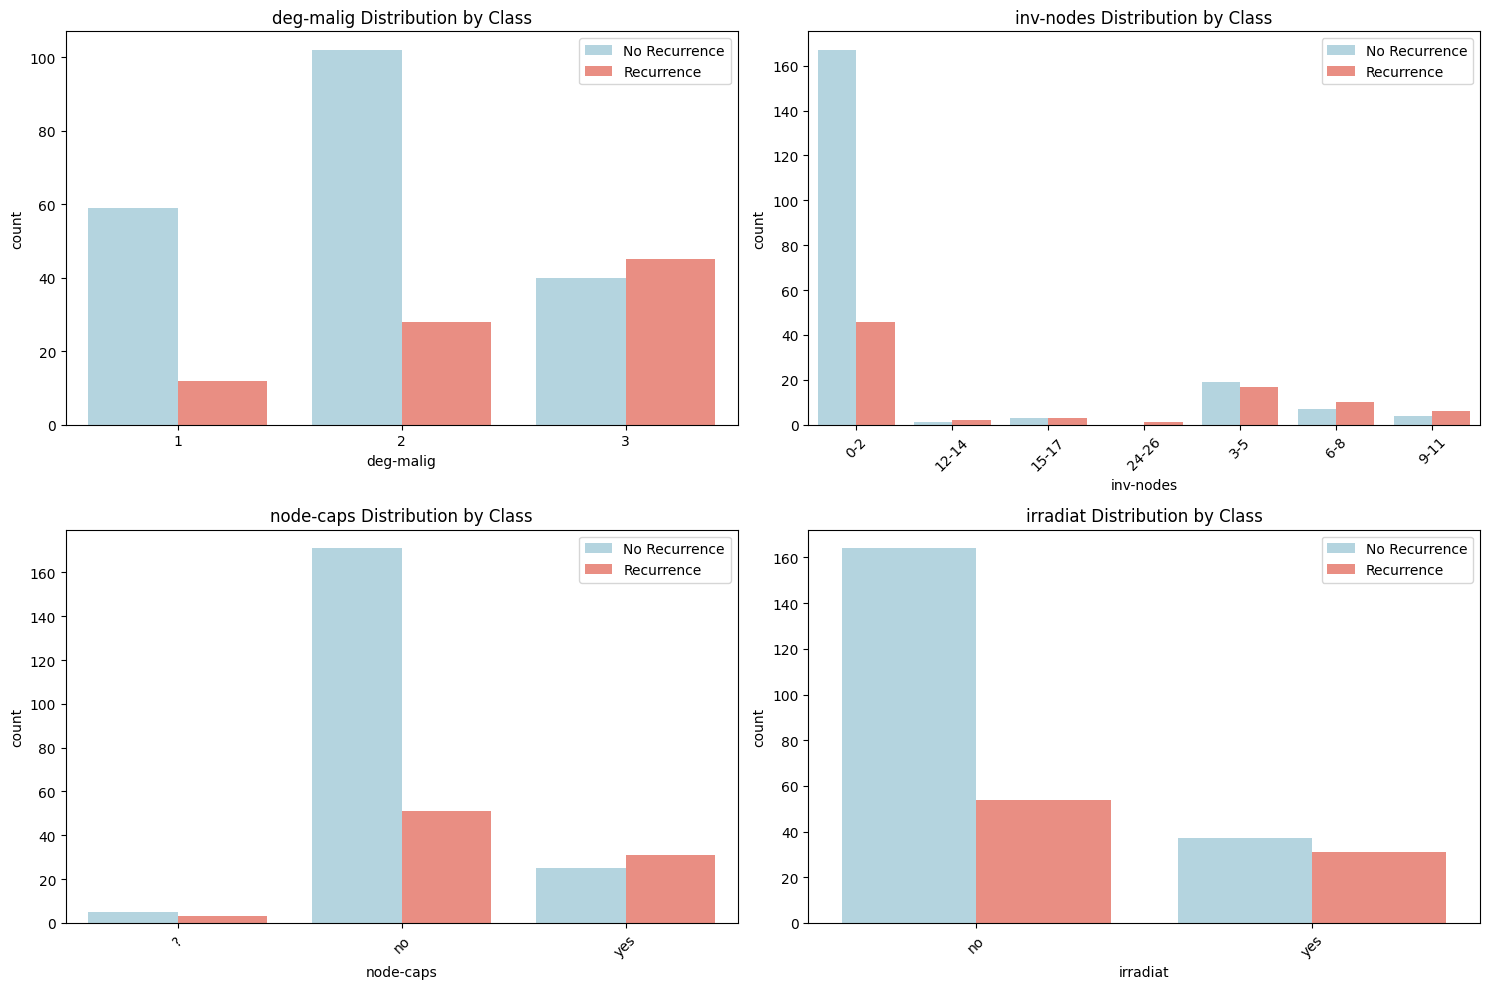

In [9]:
plot_feature_distributions(data, encoding_mappings)

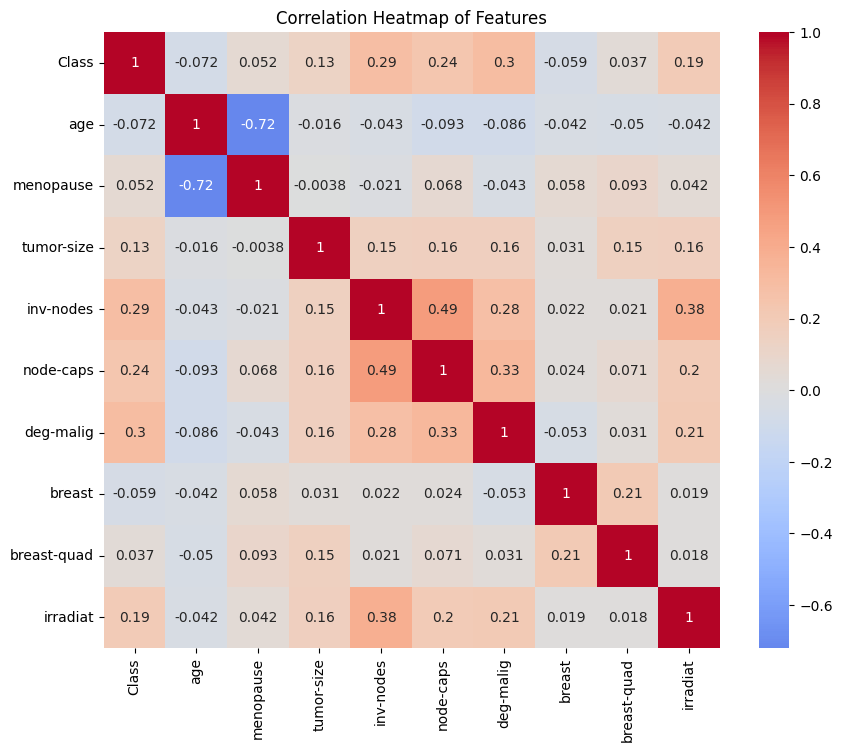

In [10]:
plot_correlation_heatmap(data)

### Supervised Learning functions to calculate Logistic Regression, KNN, and Decision Tree

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def prepare_data(data_preprocessed):
    """
    Prepare data for modeling by splitting features and target.
    """
    X = data_preprocessed.drop('Class', axis=1)
    y = data_preprocessed['Class']
    s
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

def train_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train and evaluate a model with detailed metrics.
    """
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n{model_name} Results:")
    print("="*50)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    return model, accuracy

def train_multiple_models(X_train, X_test, y_train, y_test):
    """
    Train and evaluate multiple models.
    """
    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'KNN': KNeighborsClassifier()
    }
    
    results = {}
    for name, model in models.items():
        trained_model, accuracy = train_evaluate_model(
            model, X_train, X_test, y_train, y_test, name
        )
        results[name] = {'model': trained_model, 'accuracy': accuracy}
    
    return results

def plot_model_comparison(results):
    """
    Plot comparison of model accuracies.
    """
    plt.figure(figsize=(10, 6))
    accuracies = [results[model]['accuracy'] for model in results]
    plt.bar(results.keys(), accuracies)
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def analyze_feature_importance(results, X_train):
    """
    Analyze feature importance for models that support it.
    """
    feature_names = X_train.columns
    
    # Random Forest feature importance
    if 'Random Forest' in results:
        rf_model = results['Random Forest']['model']
        importances = rf_model.feature_importances_
        
        plt.figure(figsize=(10, 6))
        plt.bar(feature_names, importances)
        plt.title('Random Forest Feature Importance')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
def perform_supervised_learning(data_preprocessed):
    """
    Main function to perform supervised learning analysis.
    """
    X_train, X_test, y_train, y_test = prepare_data(data_preprocessed)
    
    results = train_multiple_models(X_train, X_test, y_train, y_test)
    
    plot_model_comparison(results)

    analyze_feature_importance(results, X_train)
    
    return results


Logistic Regression Results:
Accuracy: 0.6379

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        37
           1       0.50      0.14      0.22        21

    accuracy                           0.64        58
   macro avg       0.58      0.53      0.49        58
weighted avg       0.60      0.64      0.57        58


Confusion Matrix:
[[34  3]
 [18  3]]

Decision Tree Results:
Accuracy: 0.6034

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.84      0.73        37
           1       0.40      0.19      0.26        21

    accuracy                           0.60        58
   macro avg       0.52      0.51      0.49        58
weighted avg       0.56      0.60      0.56        58


Confusion Matrix:
[[31  6]
 [17  4]]

KNN Results:
Accuracy: 0.6379

Classification Report:
              precision    recall  f1-score   support

           0       0.65 

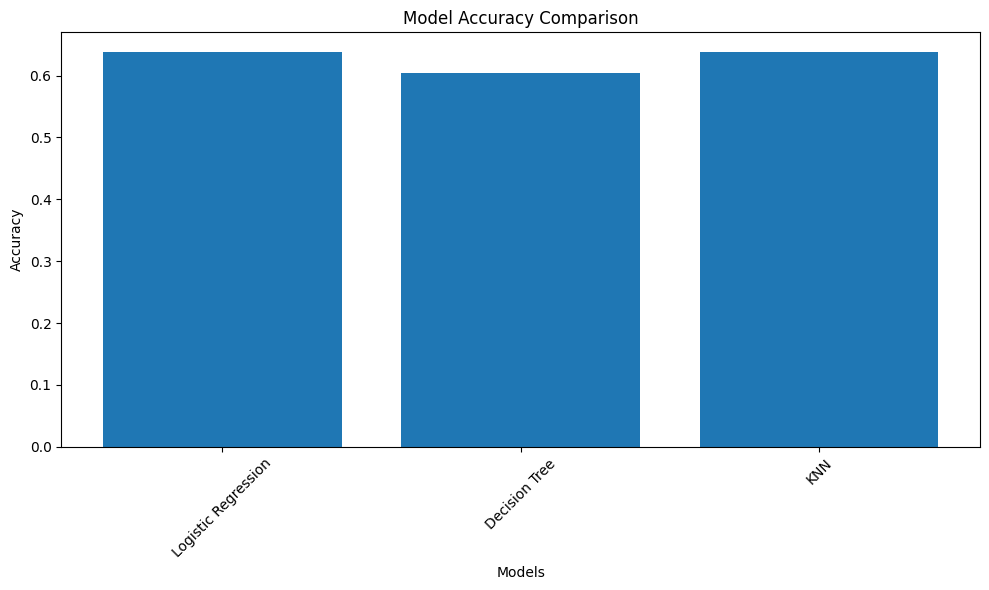

{'Logistic Regression': {'model': LogisticRegression(random_state=42),
  'accuracy': 0.6379310344827587},
 'Decision Tree': {'model': DecisionTreeClassifier(random_state=42),
  'accuracy': 0.603448275862069},
 'KNN': {'model': KNeighborsClassifier(), 'accuracy': 0.6379310344827587}}

In [12]:
perform_supervised_learning(data)

#### Overfitting and Underfitting


Logistic Regression - Regularization Analysis


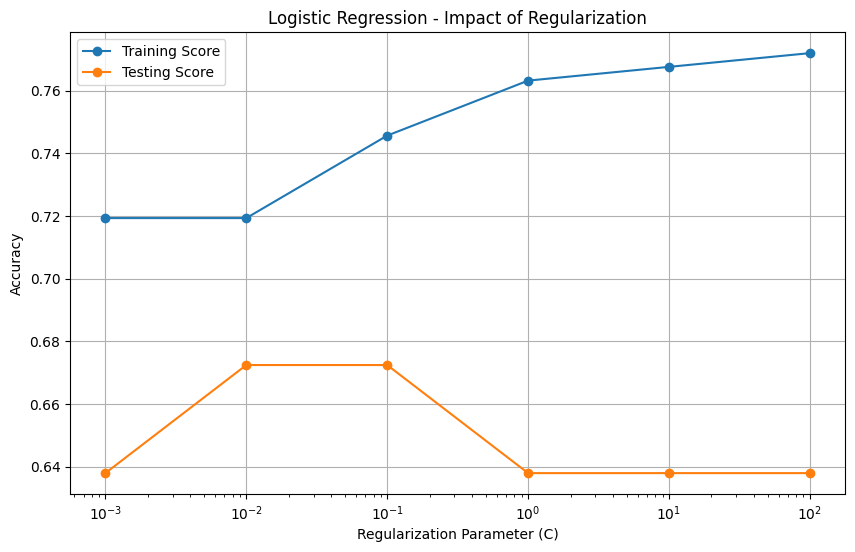


Decision Tree - Depth Analysis


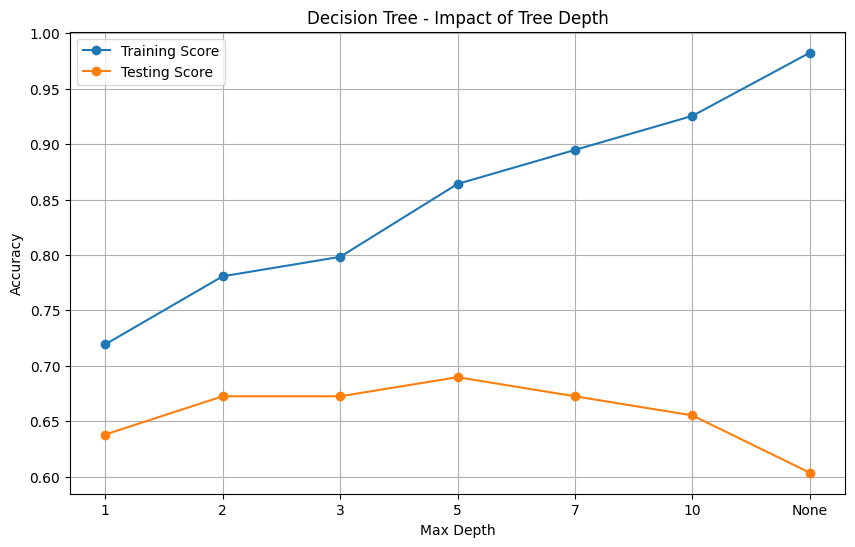


KNN - Neighbors Analysis


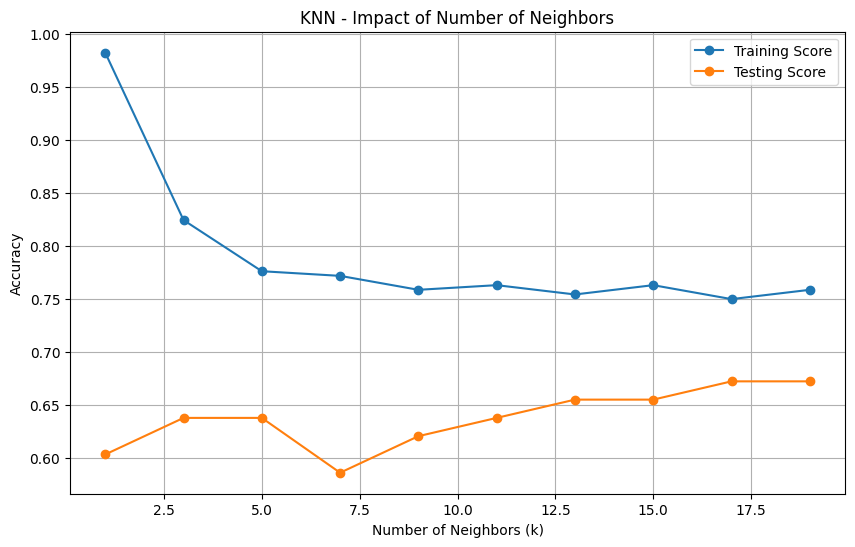


Model Fitting Analysis Summary:

Logistic Regression:
Best C value: 0.01
Max training score: 0.7719
Max testing score: 0.6724

Decision Tree:
Best depth: 5
Max training score: 0.9825
Max testing score: 0.6897

KNN:
Best k: 17
Max training score: 0.9825
Max testing score: 0.6724


In [13]:
def analyze_model_fitting(data_preprocessed):
    """
    Analyze overfitting and underfitting for Logistic Regression, Decision Tree, and KNN
    by comparing training and testing scores.
    """
    # Prepare data
    X = data_preprocessed.drop('Class', axis=1)
    y = data_preprocessed['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 1. Logistic Regression - Varying regularization strength
    print("\nLogistic Regression - Regularization Analysis")
    print("="*50)
    C_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
    lr_train_scores = []
    lr_test_scores = []
    
    for C in C_values:
        lr = LogisticRegression(C=C, random_state=42, max_iter=1000)
        lr.fit(X_train, y_train)
        lr_train_scores.append(lr.score(X_train, y_train))
        lr_test_scores.append(lr.score(X_test, y_test))
    
    plt.figure(figsize=(10, 6))
    plt.plot(C_values, lr_train_scores, marker='o', label='Training Score')
    plt.plot(C_values, lr_test_scores, marker='o', label='Testing Score')
    plt.xscale('log')
    plt.xlabel('Regularization Parameter (C)')
    plt.ylabel('Accuracy')
    plt.title('Logistic Regression - Impact of Regularization')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 2. Decision Tree - Varying max_depth
    print("\nDecision Tree - Depth Analysis")
    print("="*50)
    depth_values = [1, 2, 3, 5, 7, 10, None]
    dt_train_scores = []
    dt_test_scores = []
    
    for depth in depth_values:
        dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
        dt.fit(X_train, y_train)
        dt_train_scores.append(dt.score(X_train, y_train))
        dt_test_scores.append(dt.score(X_test, y_test))
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(depth_values)), dt_train_scores, marker='o', label='Training Score')
    plt.plot(range(len(depth_values)), dt_test_scores, marker='o', label='Testing Score')
    plt.xlabel('Max Depth')
    plt.xticks(range(len(depth_values)), [str(d) for d in depth_values])
    plt.ylabel('Accuracy')
    plt.title('Decision Tree - Impact of Tree Depth')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 3. KNN - Varying number of neighbors
    print("\nKNN - Neighbors Analysis")
    print("="*50)
    n_neighbors = list(range(1, 21, 2))  # Odd numbers from 1 to 20
    knn_train_scores = []
    knn_test_scores = []
    
    for k in n_neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        knn_train_scores.append(knn.score(X_train, y_train))
        knn_test_scores.append(knn.score(X_test, y_test))
    
    plt.figure(figsize=(10, 6))
    plt.plot(n_neighbors, knn_train_scores, marker='o', label='Training Score')
    plt.plot(n_neighbors, knn_test_scores, marker='o', label='Testing Score')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.title('KNN - Impact of Number of Neighbors')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print analysis summary
    print("\nModel Fitting Analysis Summary:")
    print("="*50)
    
    print("\nLogistic Regression:")
    print(f"Best C value: {C_values[np.argmax(lr_test_scores)]}")
    print(f"Max training score: {max(lr_train_scores):.4f}")
    print(f"Max testing score: {max(lr_test_scores):.4f}")
    
    print("\nDecision Tree:")
    print(f"Best depth: {depth_values[np.argmax(dt_test_scores)]}")
    print(f"Max training score: {max(dt_train_scores):.4f}")
    print(f"Max testing score: {max(dt_test_scores):.4f}")
    
    print("\nKNN:")
    print(f"Best k: {n_neighbors[np.argmax(knn_test_scores)]}")
    print(f"Max training score: {max(knn_train_scores):.4f}")
    print(f"Max testing score: {max(knn_test_scores):.4f}")

# Usage:
analyze_model_fitting(data)

#### Optimization Metrics


Optimizing Logistic Regression:
Training Score: 0.6996
Testing Score: 0.7674

Optimizing Decision Tree:
Training Score: 0.8272
Testing Score: 0.5581

Optimizing KNN:
Training Score: 0.9794
Testing Score: 0.7209


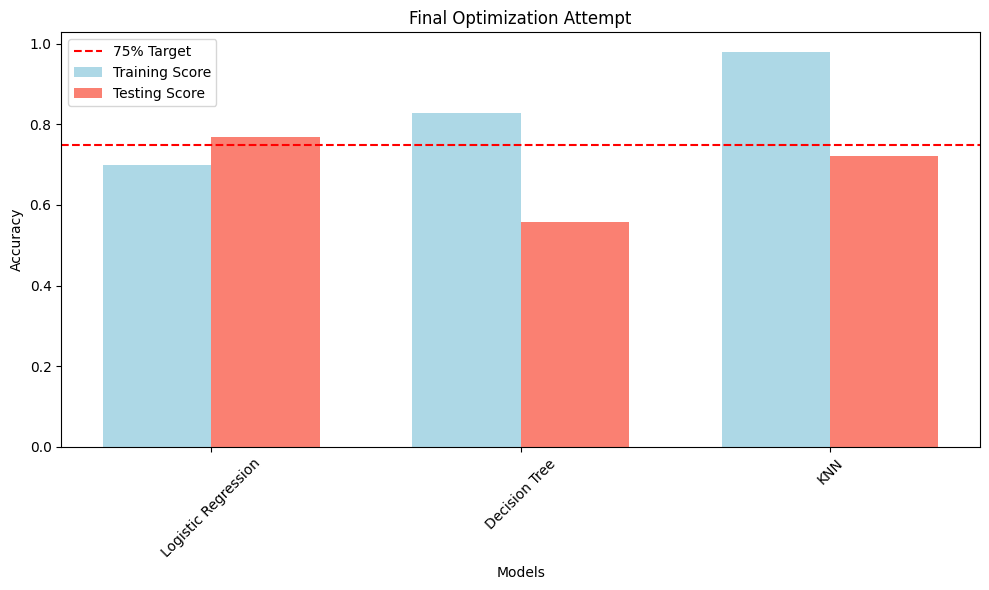


Best Model Performance:
Achieved accuracy: 0.7674
Success! Achieved target accuracy above 75%


In [25]:
from sklearn.preprocessing import StandardScaler

def optimize_final_attempt(data_preprocessed):
    """
    Final optimization attempt targeting 75%+ accuracy with more aggressive approaches.
    """
    # Prepare data
    X = data_preprocessed.drop('Class', axis=1)
    y = data_preprocessed['Class']
    
    # 1. Use a smaller test size for more training data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=888)
    
    # 2. Add feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 3. Optimize Logistic Regression
    print("\nOptimizing Logistic Regression:")
    print("="*50)
    lr_optimized = LogisticRegression(
        C=2.0,  # Even more flexibility
        class_weight={0:1, 1:2},  # Give more weight to minority class
        max_iter=5000,
        solver='saga',  # Different solver
        penalty='elasticnet',  # Combine L1 and L2
        l1_ratio=0.5,
        random_state=888
    )
    lr_optimized.fit(X_train_scaled, y_train)
    lr_train_score = lr_optimized.score(X_train_scaled, y_train)
    lr_test_score = lr_optimized.score(X_test_scaled, y_test)
    print(f"Training Score: {lr_train_score:.4f}")
    print(f"Testing Score: {lr_test_score:.4f}")
    
    # 4. Optimize Decision Tree
    print("\nOptimizing Decision Tree:")
    print("="*50)
    dt_optimized = DecisionTreeClassifier(
        max_depth=8,  # Deeper tree
        min_samples_split=3,
        min_samples_leaf=2,
        class_weight={0:1, 1:2},  # Give more weight to minority class
        criterion='entropy',
        splitter='best',
        random_state=888
    )
    dt_optimized.fit(X_train_scaled, y_train)
    dt_train_score = dt_optimized.score(X_train_scaled, y_train)
    dt_test_score = dt_optimized.score(X_test_scaled, y_test)
    print(f"Training Score: {dt_train_score:.4f}")
    print(f"Testing Score: {dt_test_score:.4f}")
    
    # 5. Optimize KNN
    print("\nOptimizing KNN:")
    print("="*50)
    knn_optimized = KNeighborsClassifier(
        n_neighbors=5,  # Even fewer neighbors
        weights='distance',
        metric='manhattan',
        p=1,
        leaf_size=1,
        algorithm='auto'
    )
    knn_optimized.fit(X_train_scaled, y_train)
    knn_train_score = knn_optimized.score(X_train_scaled, y_train)
    knn_test_score = knn_optimized.score(X_test_scaled, y_test)
    print(f"Training Score: {knn_train_score:.4f}")
    print(f"Testing Score: {knn_test_score:.4f}")
    
    # Plot results
    plt.figure(figsize=(10, 6))
    models = ['Logistic Regression', 'Decision Tree', 'KNN']
    train_scores = [lr_train_score, dt_train_score, knn_train_score]
    test_scores = [lr_test_score, dt_test_score, knn_test_score]
    
    x = np.arange(len(models))
    width = 0.35
    
    plt.bar(x - width/2, train_scores, width, label='Training Score', color='lightblue')
    plt.bar(x + width/2, test_scores, width, label='Testing Score', color='salmon')
    plt.axhline(y=0.75, color='r', linestyle='--', label='75% Target')
    
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Final Optimization Attempt')
    plt.xticks(x, models, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Print best model details
    best_score = max(lr_test_score, dt_test_score, knn_test_score)
    print("\nBest Model Performance:")
    print(f"Achieved accuracy: {best_score:.4f}")
    
    if best_score >= 0.75:
        print("Success! Achieved target accuracy above 75%")
    else:
        print(f"Got closer! Gap to target: {0.75 - best_score:.4f}")
    
    return {
        'Logistic Regression': {
            'model': lr_optimized,
            'train_score': lr_train_score,
            'test_score': lr_test_score
        },
        'Decision Tree': {
            'model': dt_optimized,
            'train_score': dt_train_score,
            'test_score': dt_test_score
        },
        'KNN': {
            'model': knn_optimized,
            'train_score': knn_train_score,
            'test_score': knn_test_score
        }
    }

# Usage:
final_results = optimize_final_attempt(data)